In [ ]:
pip install scikit-fuzzy

In [ ]:
pip install paho-mqtt

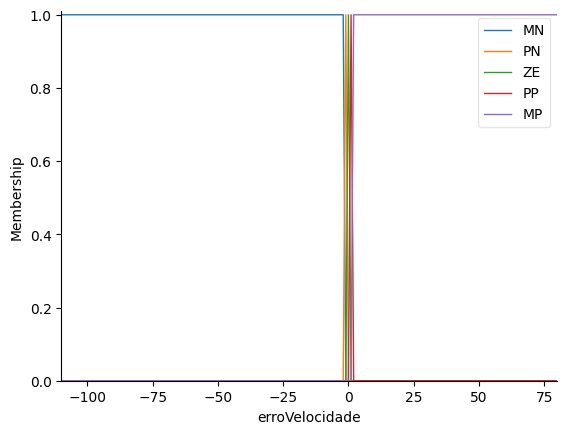

In [129]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt             #CLIENTE QUE FARÁ AS PUBLICAÇÕES NO BROKER
from skfuzzy import control as ctrl
import time

mqttBroker = "test.mosquitto.org"           #SERVIDOR onde conectaremos o nosso cliente
client = mqtt.Client("C213_grupo6")
client.connect(mqttBroker)

#New Antecedent/Consequent objects hold universe variables and membership
#functions
erroVelocidade = ctrl.Antecedent(np.arange(-110, 81, 1), 'erroVelocidade')
varerroVelocidade = ctrl.Antecedent(np.arange(-10, 11, 1), 'varerroVelocidade')
acceleration = ctrl.Consequent(np.arange(0, 101, 1), 'acceleration')

#Custom membership functions can be built interactively with a familiar
#Pythonic API
erroVelocidade['MN'] = fuzz.trapmf(erroVelocidade.universe, [-110, -110, -2, -1])
erroVelocidade['PN'] = fuzz.trimf(erroVelocidade.universe, [-2,-1,0])
erroVelocidade['ZE'] = fuzz.trimf(erroVelocidade.universe, [-1, 0,1])
erroVelocidade['PP'] = fuzz.trimf(erroVelocidade.universe, [0, 1, 2])
erroVelocidade['MP'] = fuzz.trapmf(erroVelocidade.universe, [1, 2, 80, 80])
#You can see how these look with .view()
erroVelocidade.view()

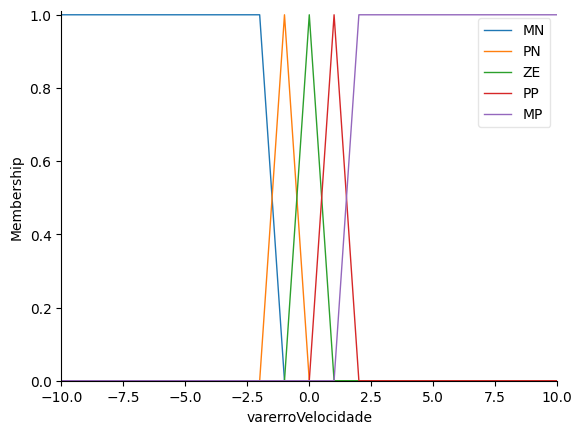

In [130]:
varerroVelocidade['MN'] = fuzz.trapmf(varerroVelocidade.universe, [-10, -10, -2, -1])
varerroVelocidade['PN'] = fuzz.trimf(varerroVelocidade.universe, [-2,-1,0])
varerroVelocidade['ZE'] = fuzz.trimf(varerroVelocidade.universe, [-1, 0,1])
varerroVelocidade['PP'] = fuzz.trimf(varerroVelocidade.universe, [0, 1, 2])
varerroVelocidade['MP'] = fuzz.trapmf(varerroVelocidade.universe, [1, 2, 10, 10])
#You can see how these look with .view()
varerroVelocidade.view()

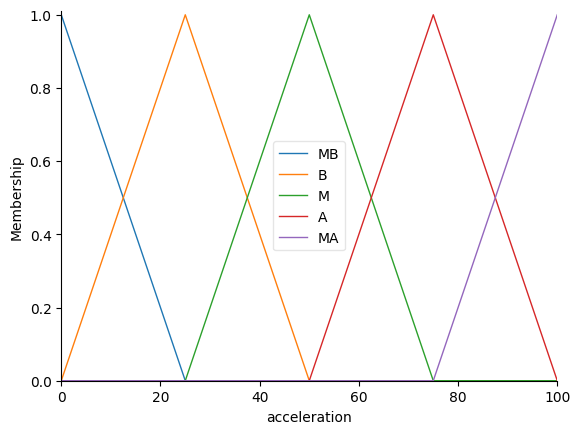

In [131]:
acceleration['MB'] = fuzz.trimf(acceleration.universe, [0, 0, 25])
acceleration['B'] = fuzz.trimf(acceleration.universe, [0, 25, 50])
acceleration['M'] = fuzz.trimf(acceleration.universe, [25, 50, 75])
acceleration['A'] = fuzz.trimf(acceleration.universe, [50, 75, 100])
acceleration['MA'] = fuzz.trimf(acceleration.universe, [75, 100, 100])
acceleration.view()

Regras de funcionamento

In [132]:
#Regras p/ a varerroVelocidade MN
regra1 = ctrl.Rule(erroVelocidade['MN'] & varerroVelocidade['MN'], acceleration['MA'])
regra2 = ctrl.Rule(erroVelocidade['PN'] & varerroVelocidade['MN'], acceleration['MA'])
regra3 = ctrl.Rule(erroVelocidade['ZE'] & varerroVelocidade['MN'], acceleration['A'])
regra4 = ctrl.Rule(erroVelocidade['PP'] & varerroVelocidade['MN'], acceleration['M'])
regra5 = ctrl.Rule(erroVelocidade['MP'] & varerroVelocidade['MN'], acceleration['M'])

#Regras p/ a varerroVelocidade PN
regra6 = ctrl.Rule(erroVelocidade['MN'] & varerroVelocidade['PN'], acceleration['MA'])
regra7 = ctrl.Rule(erroVelocidade['PN'] & varerroVelocidade['PN'], acceleration['A'])
regra8 = ctrl.Rule(erroVelocidade['ZE'] & varerroVelocidade['PN'], acceleration['A'])
regra9 = ctrl.Rule(erroVelocidade['PP'] & varerroVelocidade['PN'], acceleration['B'])
regra10 =ctrl.Rule(erroVelocidade['MP'] & varerroVelocidade['PN'], acceleration['B'])

#Regras p/ a varerroVelocidade ZE
regra11 = ctrl.Rule(erroVelocidade['MN'] & varerroVelocidade['ZE'], acceleration['MA'])
regra12 = ctrl.Rule(erroVelocidade['PN'] & varerroVelocidade['ZE'], acceleration['A'])
regra13 = ctrl.Rule(erroVelocidade['ZE'] & varerroVelocidade['ZE'], acceleration['M'])
regra14 = ctrl.Rule(erroVelocidade['PP'] & varerroVelocidade['ZE'], acceleration['B'])
regra15 = ctrl.Rule(erroVelocidade['MP'] & varerroVelocidade['ZE'], acceleration['MB'])

#Regras p/ a varerroVelocidade PP
regra16 = ctrl.Rule(erroVelocidade['MN'] & varerroVelocidade['PP'], acceleration['A'])
regra17 = ctrl.Rule(erroVelocidade['PN'] & varerroVelocidade['PP'], acceleration['A'])
regra18 = ctrl.Rule(erroVelocidade['ZE'] & varerroVelocidade['PP'], acceleration['B'])
regra19 = ctrl.Rule(erroVelocidade['PP'] & varerroVelocidade['PP'], acceleration['B'])
regra20 = ctrl.Rule(erroVelocidade['MP'] & varerroVelocidade['PP'], acceleration['MB'])

#Regras p/ a varerroAVelocidade MP
regra21 = ctrl.Rule(erroVelocidade['MN'] & varerroVelocidade['MP'], acceleration['M'])
regra22 = ctrl.Rule(erroVelocidade['PN'] & varerroVelocidade['MP'], acceleration['M'])
regra23 = ctrl.Rule(erroVelocidade['ZE'] & varerroVelocidade['MP'], acceleration['B'])
regra24 = ctrl.Rule(erroVelocidade['PP'] & varerroVelocidade['MP'], acceleration['MB'])
regra25 = ctrl.Rule(erroVelocidade['MP'] & varerroVelocidade['MP'], acceleration['MB'])

In [133]:
acceleration_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
controle = ctrl.ControlSystemSimulation(acceleration_ctrl)

In [134]:
#Entradas de dados p/ as operações:
print('''MENU DE CONTROLE DO CARRO
[1] - MANTER O CARRO EM BAIXA VELOCIDADE
[2] - MANTER O CARRO EM MÉDIA VELOCIDADE
[3] - MANTER O CARRO EM ALTA VELOCIDADE
[4] - OUTRO MODO DE OPERAÇÃO\n''')

op = -1
while(op < 1 or op > 4):
  op = int(input('ESCOLHA UMA OPÇÃO: '))

if(op == 1):
  sp = 60
elif(op == 2):
  sp = 80
elif(op == 3):
  sp = 110
elif(op == 4):
  sp = int(input('ESCOLHA O SETPOINT: '))


print('\nVelocidade atual do carro: ')

velocidadeAtual = -1
while(velocidadeAtual < 0 or velocidadeAtual > 140):
    print('0 Km/h a 140 Km/h')
    velocidadeAtual = float(input())

MENU DE CONTROLE DO CARRO
[1] - MANTER O CARRO EM BAIXA VELOCIDADE
[2] - MANTER O CARRO EM MÉDIA VELOCIDADE
[3] - MANTER O CARRO EM ALTA VELOCIDADE
[4] - OUTRO MODO DE OPERAÇÃO

ESCOLHA UMA OPÇÃO: 1

Velocidade atual do carro: 
0 Km/h a 140 Km/h
80


In [135]:
print(velocidadeAtual)
erroatual = 0

while True:
  erroanterior = erroatual
  erroatual = velocidadeAtual - sp
  varerroVelocidade = erroatual - erroanterior
  controle.input['erroVelocidade'] = erroatual
  controle.input['varerroVelocidade'] = varerroVelocidade
  controle.compute()
  i = 0
  while (i < 10):
    velocidadeAtual = velocidadeAtual * 0.9954 + controle.output['acceleration'] * 0.007563
    time.sleep(0.1)
    i += 1
  print(velocidadeAtual)
  client.publish("Carro/Velocidade", velocidadeAtual)     #Tópico onde estará sendo publicado os dados da velocidade do carro
  client.publish("Carro/Erro", erroatual)                 #Tópico onde estará sendo publicado os dados de erro

80.0
77.01261163206038
77.24664603663368
74.41072349052564
74.76199737930592
72.06700546984543
72.52388585549419
69.96182141198588
70.51356010040493
68.03928052185744
68.67764772390373
66.25973231266815
66.97828486582019
64.61580926060003
65.40843597844186
63.10052348032262
63.961428046266285
61.70721380132073
62.630900047037294
60.42949313837232
62.441650840375424
60.245430918972616
62.558772349387205
60.35727500460602
62.48278652342909
60.28471305337185
62.5297582844853
60.32956829567746
62.49983855749893
60.300996733242634
62.518483468025465
60.318801515533714
62.5067990119257
60.307643553861006
62.51404725749661
60.31456519793103
62.509522608873425
60.31024442720036
62.51233597845249
60.31293102807132
62.51058238321358
60.311256448758584
62.51167374752232
60.31229863686078
62.51099388383383
60.31164940741322
62.511417153661654
60.31205360496215
62.511153537221546
60.31180186691718
62.511317682416866
60.31195861583065
62.511215460080635
60.3118609995702
62.51127911395614
60.31192178

KeyboardInterrupt: ignored